In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [10]:
Chemical_plant = pd.read_csv('e11.csv')
Chemical_plant['c1'] = pd.to_datetime(Chemical_plant['c1'],format='%d-%m-%Y')


Chemical_plant['day_column'] = Chemical_plant['c1'].dt.day
Chemical_plant['month_column'] = Chemical_plant['c1'].dt.month
Chemical_plant['year_column'] = Chemical_plant['c1'].dt.year



# Replace specific error values with NaN in the entire DataFrame
Chemical_plant.replace(['#REF!', '#N/A', '#VALUE!'], np.nan, inplace=True)
Chemical_plant.to_csv('Chemical_plant.csv', index=False)


PermissionError: [Errno 13] Permission denied: 'Chemical_plant.csv'

In [25]:
print(Chemical_plant.head())

Modified_plant = pd.DataFrame()
for column in Chemical_plant.columns :
    zero_count = (Chemical_plant[column] == 0).sum()
    if zero_count < 0.1 * len(Chemical_plant[column]) :
        Modified_plant[column] = Chemical_plant[column]
Modified_plant.drop('c1', axis=1, inplace=True)
Modified_plant.drop('c229', axis=1, inplace=True)
Modified_plant.drop('c226', axis=1, inplace=True)
Modified_plant.drop('c199', axis=1, inplace=True)
Modified_plant.drop('c202', axis=1, inplace=True)
Modified_plant.drop('c204', axis=1, inplace=True)
Modified_plant.drop('c188', axis=1, inplace=True)
Modified_plant.drop('c189', axis=1, inplace=True)
Modified_plant.drop('c190', axis=1, inplace=True)
for column in Modified_plant[['c231','c232','c233','c234','c223','c113','c133','c149','c207','c208','c209','c210','c211','c212',
                            'c213','c214','c215','c216','c217','c218','c219','c220','c221','c222','c206',
                             'c82','c166','c110']] :
    Modified_plant[column] = Modified_plant[column].apply(pd.to_numeric, errors = 'coerce')
    mean_value = Modified_plant[column].mean()
    Modified_plant[column].fillna(mean_value, inplace=True)
Modified_plant.fillna(0,inplace = True)

Modified_plant.to_csv('Modified_plant.csv', index=False)

          c1  c2          c3          c4        c5        c6        c7  \
0 2018-09-01   2  164.154800  155.467568  0.707847  1.227071  2.264965   
1 2018-09-02   2  162.115737  153.645223  0.454140  0.671909  2.260011   
2 2018-09-03   2  153.718388  142.880092  0.634565  0.683161  2.085850   
3 2018-09-04   2  169.214952  157.342985  0.646557  0.722743  2.258069   
4 2018-09-05   2  176.335010  163.307519  0.683941  0.681609  2.252392   

          c8        c9       c10  ...  c234         c235       c236  \
0  18.978886  7.561194  0.719497  ...   NaN  0.670199532  68.098119   
1  18.639050  7.844962  0.702348  ...   NaN  0.671396131  68.027155   
2  16.671939  6.708392  0.656799  ...   NaN  0.672457799  67.502954   
3  17.871757  7.239110  0.662394  ...   NaN  0.670275002  68.202787   
4  18.591802  7.257898  0.689549  ...   NaN  0.669760363  68.254780   

        c237       c238       c239      c241  day_column  month_column  \
0  66.492249  32.753858  42.811412  2.184083          

C:\Users\yashm\AppData\Local\Temp\ipykernel_22880\4079076959.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Modified_plant[column] = Chemical_plant[column]
C:\Users\yashm\AppData\Local\Temp\ipykernel_22880\4079076959.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Modified_plant[column] = Chemical_plant[column]
C:\Users\yashm\AppData\Local\Temp\ipykernel_22880\4079076959.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.

In [27]:
All_parameters = pd.read_csv('Modified_plant.csv')
Y1 = All_parameters['c51']
Y2 = All_parameters['c52']
Y3 = All_parameters['c53']
Y4 = All_parameters['c54']
All_parameters.drop('c51', axis=1, inplace=True)
All_parameters.drop('c52', axis=1, inplace=True)
All_parameters.drop('c53', axis=1, inplace=True)
All_parameters.drop('c54', axis=1, inplace=True)
X = All_parameters


In [34]:
#Analysis of c51
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
X = X.apply(pd.to_numeric, errors='coerce')

Y1 = Y1.apply(pd.to_numeric, errors='coerce')
X.fillna(0.00, inplace=True)

X_train, X_test, Y1_train, Y1_test = train_test_split(X, Y1, test_size=0.2, random_state=42)

mlr_model1 = sm.OLS(Y1_train, X_train).fit()


# Function to eliminate parameters one by one based on p-value
def backward_elimination(model, X, Y):
    while model.pvalues.max() > 0.05:
        # Find the parameter with the highest p-value
        max_pvalue_idx = model.pvalues.idxmax()

        # Drop the parameter with the highest p-value from the feature matrix
        X = X.drop(max_pvalue_idx, axis=1)
        
        # Fit a new model without the eliminated parameter
        model = sm.OLS(Y,X).fit()

    return model, X

# Perform backward elimination
final_model, final_X = backward_elimination(mlr_model1, X, Y1)
final_X_test = X_test[final_X.columns]
# Display the summary of the final model
print(final_model.summary())

parameters1 = []
for column in final_X.columns :
    parameters1.append(column)
    
print(parameters1)




                                 OLS Regression Results                                
Dep. Variable:                    c51   R-squared (uncentered):                   0.994
Model:                            OLS   Adj. R-squared (uncentered):              0.994
Method:                 Least Squares   F-statistic:                              1352.
Date:                Sun, 12 Nov 2023   Prob (F-statistic):                        0.00
Time:                        17:39:07   Log-Likelihood:                         -1129.2
No. Observations:                1025   AIC:                                      2498.
Df Residuals:                     905   BIC:                                      3090.
Df Model:                         120                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [35]:
X2 = All_parameters

In [36]:
#Analysis of c52
X2 = X2.apply(pd.to_numeric, errors='coerce')

Y2 = Y2.apply(pd.to_numeric, errors='coerce')

X2.fillna(0.00, inplace=True)

X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size=0.2, random_state=42)


mlr_model2 = sm.OLS(Y2_train, X2_train).fit()

final_model2, final_X2 = backward_elimination(mlr_model2, X2, Y2)
final_X2_test = X2_test[final_X2.columns]

print(final_model2.summary())

parameters2 = []
for column in final_X2.columns :
    parameters2.append(column)
    
print(parameters2)


                            OLS Regression Results                            
Dep. Variable:                    c52   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     228.2
Date:                Sun, 12 Nov 2023   Prob (F-statistic):               0.00
Time:                        17:40:32   Log-Likelihood:                -540.90
No. Observations:                1025   AIC:                             1310.
Df Residuals:                     911   BIC:                             1872.
Df Model:                         113                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
c3              -0.3250      0.076     -4.276   

In [37]:
X3 = All_parameters

In [38]:

#Analysis of c53
X3 = X3.apply(pd.to_numeric, errors='coerce')

Y3 = Y3.apply(pd.to_numeric, errors='coerce')

X3.fillna(0.00, inplace=True)

X3_train, X3_test, Y3_train, Y3_test = train_test_split(X3, Y3, test_size=0.2, random_state=42)


mlr_model3 = sm.OLS(Y3_train, X3_train).fit()

final_model3, final_X3 = backward_elimination(mlr_model3, X3, Y3)
final_X3_test = X3_test[final_X3.columns]

print(final_model3.summary())

parameters3 = []
for column in final_X3.columns :
    parameters3.append(column)
    
print(parameters3)


                            OLS Regression Results                            
Dep. Variable:                    c53   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     587.0
Date:                Sun, 12 Nov 2023   Prob (F-statistic):               0.00
Time:                        17:44:44   Log-Likelihood:                -1194.3
No. Observations:                1025   AIC:                             2601.
Df Residuals:                     919   BIC:                             3124.
Df Model:                         105                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c2          1.349e+04   5717.368      2.359      0.0

In [39]:
X4 = All_parameters


In [40]:
X4 = X4.apply(pd.to_numeric, errors='coerce')

Y4 = Y4.apply(pd.to_numeric, errors='coerce')

X4.fillna(0.00, inplace=True)

X4_train, X4_test, Y4_train, Y4_test = train_test_split(X4,Y4, test_size=0.2, random_state=42)


mlr_model4 = sm.OLS(Y4_train, X4_train).fit()

final_model4, final_X4 = backward_elimination(mlr_model4, X4, Y4)
final_X4_test = X4_test[final_X4.columns]

print(final_model4.summary())

parameters4 = []
for column in final_X4.columns :
    parameters4.append(column)
    
print(parameters4)

                            OLS Regression Results                            
Dep. Variable:                    c54   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     546.9
Date:                Sun, 12 Nov 2023   Prob (F-statistic):               0.00
Time:                        17:47:59   Log-Likelihood:                -1153.0
No. Observations:                1025   AIC:                             2510.
Df Residuals:                     923   BIC:                             3013.
Df Model:                         101                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
c2            1.203e+04   5471.043      2.200   

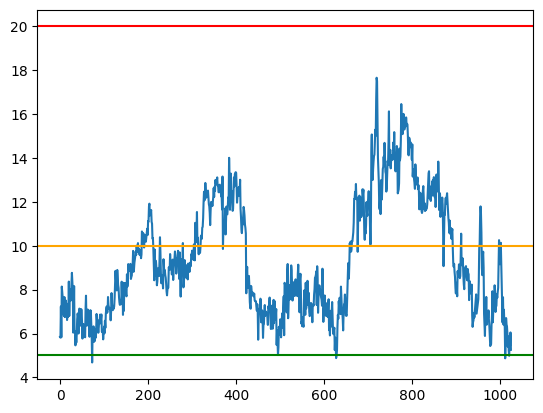

In [43]:
predictions1 = final_model.predict(final_X_test)
predictions2 = final_model2.predict(final_X2_test)
predictions3 = final_model3.predict(final_X3_test)
predictions4 = final_model4.predict(final_X4_test)
prediction = final_model.predict(final_X)
prediction2 = final_model2.predict(final_X2)
prediction3 = final_model3.predict(final_X3)
prediction4 = final_model4.predict(final_X4)
x = []
for i in range(0,len(final_X)):
    x.append(i)
plt.plot(x,prediction)
plt.axhline(5,color = 'green')
plt.axhline(10,color = 'orange')
plt.axhline(20,color = 'red')
plt.show()

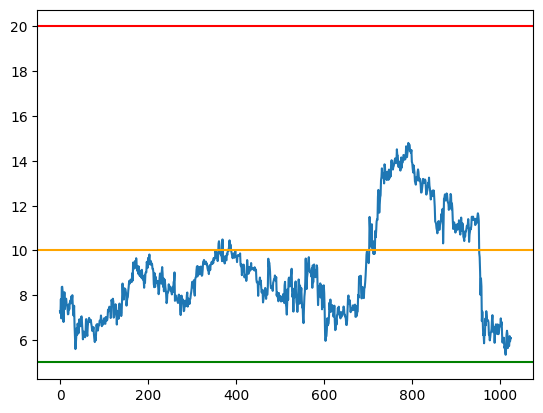

In [44]:
plt.plot(x,prediction2)
plt.axhline(5,color = 'green')
plt.axhline(10,color = 'orange')
plt.axhline(20,color = 'red')
plt.show()

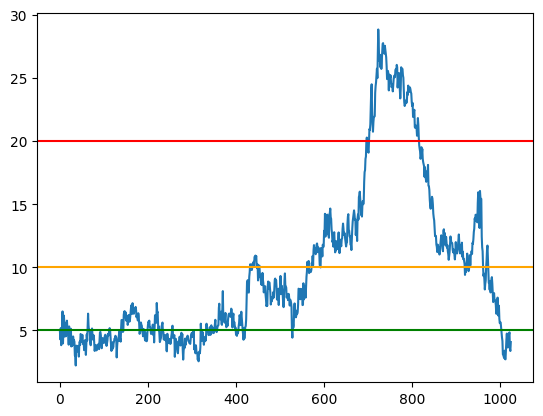

In [45]:
plt.plot(x,prediction3)
plt.axhline(5,color = 'green')
plt.axhline(10,color = 'orange')
plt.axhline(20,color = 'red')
plt.show()

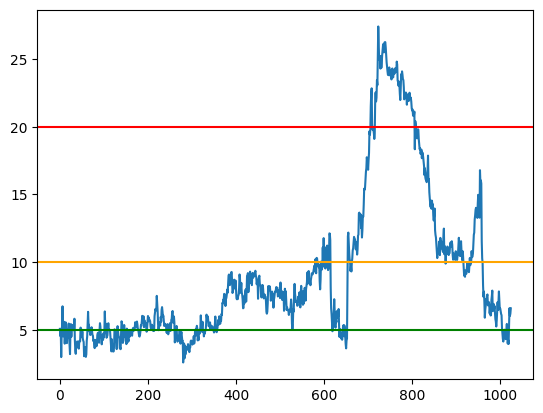

In [46]:
plt.plot(x,prediction4)
plt.axhline(5,color = 'green')
plt.axhline(10,color = 'orange')
plt.axhline(20,color = 'red')
plt.show()

In [47]:
import pandas as pd
Chemical_plant = pd.read_csv('e11.csv')
Controllable_parameters = Chemical_plant[['c26', 'c27', 'c28', 'c29', 'c30', 'c31', 'c32',
'c33', 'c39', 'c139', 'c142', 'c143', 'c155', 'c156', 'c157', 'c158', 'c160', 'c161', 'c162', 'c163']]
C = Controllable_parameters

#X=sm.add_constant(Controllable_parameters)
y1= Chemical_plant['c51']
y2= Chemical_plant['c52']
y3= Chemical_plant['c53']
y4= Chemical_plant['c54']

In [3]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
C = C.apply(pd.to_numeric, errors='coerce')

y1 = y1.apply(pd.to_numeric, errors='coerce')
C.fillna(0.00, inplace=True)

C_train, C_test, y1_train, y1_test = train_test_split(C, y1, test_size=0.2, random_state=42)

model1 = sm.OLS(y1_train, C_train).fit()


# Function to eliminate parameters one by one based on p-value
def backward_elimination(model, X, Y):
    while model.pvalues.max() > 0.05:
        # Find the parameter with the highest p-value
        max_pvalue_idx = model.pvalues.idxmax()
        print(max_pvalue_idx)
        # Drop the parameter with the highest p-value from the feature matrix
        X = X.drop(max_pvalue_idx, axis=1)

        # Fit a new model without the eliminated parameter
        model = sm.OLS(Y,X).fit()

    return model, X

# Perform backward elimination
new_model, new_C = backward_elimination(model1, C, y1)
new_C_test = C_test[new_C.columns]
# Display the summary of the final model
print(new_model.summary())


c26
c29
c162
c30
c163
                                 OLS Regression Results                                
Dep. Variable:                    c51   R-squared (uncentered):                   0.960
Model:                            OLS   Adj. R-squared (uncentered):              0.959
Method:                 Least Squares   F-statistic:                              1610.
Date:                Sun, 12 Nov 2023   Prob (F-statistic):                        0.00
Time:                        16:14:24   Log-Likelihood:                         -2143.5
No. Observations:                1025   AIC:                                      4317.
Df Residuals:                    1010   BIC:                                      4391.
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------

In [4]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
C = C.apply(pd.to_numeric, errors='coerce')

y2 = y2.apply(pd.to_numeric, errors='coerce')
C.fillna(0.00, inplace=True)

C_train, C_test, y2_train, y2_test = train_test_split(C, y2, test_size=0.2, random_state=42)

model2 = sm.OLS(y2_train, C_train).fit()

# Perform backward elimination
new_model2, new_C2 = backward_elimination(model2, C, y2)
new_C_test2 = C_test[new_C2.columns]
# Display the summary of the final model
print(new_model2.summary())


c162
c163
c156
                                 OLS Regression Results                                
Dep. Variable:                    c52   R-squared (uncentered):                   0.978
Model:                            OLS   Adj. R-squared (uncentered):              0.977
Method:                 Least Squares   F-statistic:                              2584.
Date:                Sun, 12 Nov 2023   Prob (F-statistic):                        0.00
Time:                        16:14:24   Log-Likelihood:                         -1802.3
No. Observations:                1025   AIC:                                      3639.
Df Residuals:                    1008   BIC:                                      3722.
Df Model:                          17                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

In [5]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
C = C.apply(pd.to_numeric, errors='coerce')

y3 = y3.apply(pd.to_numeric, errors='coerce')
C.fillna(0.00, inplace=True)

C_train, C_test, y3_train, y3_test = train_test_split(C, y3, test_size=0.2, random_state=42)

model3 = sm.OLS(y3_train, C_train).fit()

# Perform backward elimination
new_model3, new_C3 = backward_elimination(model3, C, y3)
new_C_test3 = C_test[new_C3.columns]
# Display the summary of the final model
print(new_model.summary())

c158
c32
c161
c29
                                 OLS Regression Results                                
Dep. Variable:                    c51   R-squared (uncentered):                   0.960
Model:                            OLS   Adj. R-squared (uncentered):              0.959
Method:                 Least Squares   F-statistic:                              1610.
Date:                Sun, 12 Nov 2023   Prob (F-statistic):                        0.00
Time:                        16:14:24   Log-Likelihood:                         -2143.5
No. Observations:                1025   AIC:                                      4317.
Df Residuals:                    1010   BIC:                                      4391.
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

In [6]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
C = C.apply(pd.to_numeric, errors='coerce')

y4 = y4.apply(pd.to_numeric, errors='coerce')
C.fillna(0.00, inplace=True)

C_train, C_test, y4_train, y4_test = train_test_split(C, y4, test_size=0.2, random_state=42)

model4 = sm.OLS(y4_train, C_train).fit()

# Perform backward elimination
new_model4, new_C4 = backward_elimination(model4, C, y4)
new_C_test4 = C_test[new_C4.columns]
# Display the summary of the final model
print(new_model4.summary())


c29
c32
c28
                                 OLS Regression Results                                
Dep. Variable:                    c54   R-squared (uncentered):                   0.935
Model:                            OLS   Adj. R-squared (uncentered):              0.934
Method:                 Least Squares   F-statistic:                              850.0
Date:                Sun, 12 Nov 2023   Prob (F-statistic):                        0.00
Time:                        16:14:25   Log-Likelihood:                         -2500.7
No. Observations:                1025   AIC:                                      5035.
Df Residuals:                    1008   BIC:                                      5119.
Df Model:                          17                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------

In [7]:
# print(mlr_model1.summary())
# print(mlr_model2.summary())
# print(mlr_model3.summary())
# print(mlr_model4.summary())

In [ ]:
# X1 = Chemical_plant[['c26', 'c27', 'c28', 'c29', 'c30', 'c31','c32','c39', 'c139', 'c142', 'c155', 'c156', 'c157', 'c158', 'c160', 'c161']]
# mlr_model1_ = sm.OLS(Y1 , X1).fit()
# print(mlr_model1_.summary())

In [ ]:
# X2 = Chemical_plant[['c26', 'c27', 'c28', 'c29', 'c30', 'c31', 'c32',
# 'c33', 'c39', 'c139', 'c142', 'c143', 'c155', 'c157', 'c158', 'c160', 'c161']]
# mlr_model2_ = sm.OLS(Y2 , X2).fit()
# print(mlr_model2_.summary())

In [ ]:
# X3 = Chemical_plant[['c26', 'c27', 'c28', 'c29', 'c30', 'c31',
# 'c33', 'c39', 'c139', 'c142', 'c143', 'c155', 'c156', 'c157', 'c160', 'c162', 'c163']]
# mlr_model3_ = sm.OLS(Y3 , X3).fit()
# print(mlr_model3_.summary())

In [ ]:
# X4 = Chemical_plant[['c26', 'c27', 'c29', 'c30', 'c31',
# 'c33', 'c39', 'c139', 'c142', 'c143', 'c155', 'c156', 'c157', 'c158', 'c160', 'c161', 'c162', 'c163']]
# mlr_model4_ = sm.OLS(Y4 , X4).fit()
# print(mlr_model4_.summary())

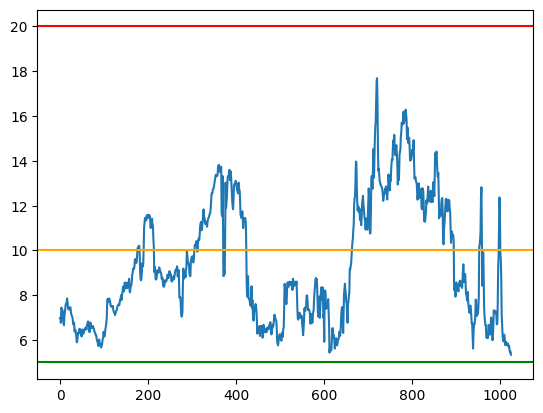

In [56]:
Chemical_plant = pd.read_csv('e11.csv')
plt.plot(Chemical_plant['c51'])
plt.axhline(5,color = 'green')
plt.axhline(10,color = 'orange')
plt.axhline(20,color = 'red')
plt.show()

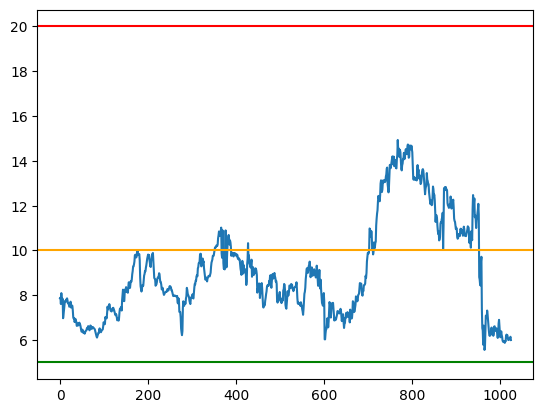

In [5]:
plt.plot(Chemical_plant['c52'])
plt.axhline(5,color = 'green')
plt.axhline(10,color = 'orange')
plt.axhline(20,color = 'red')
plt.show()

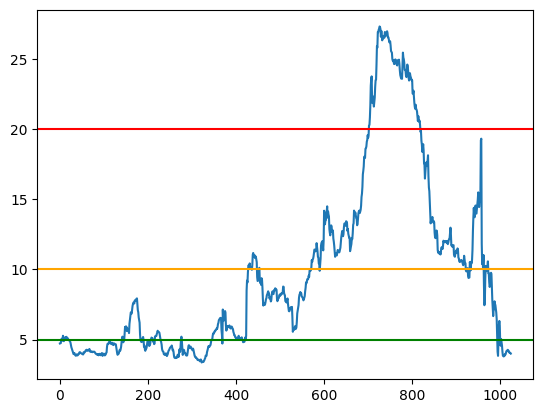

In [6]:
plt.plot(Chemical_plant['c53'])
plt.axhline(5,color = 'green')
plt.axhline(10,color = 'orange')
plt.axhline(20,color = 'red')
plt.show()

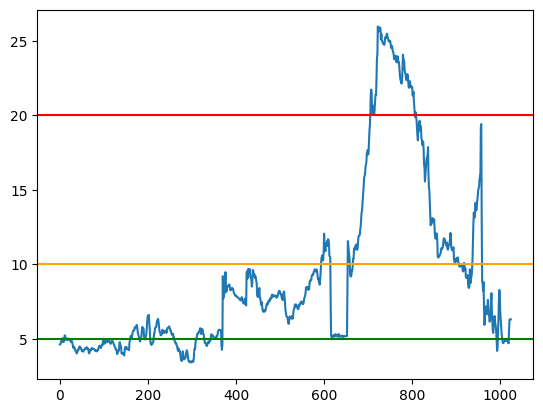

In [7]:
plt.plot(Chemical_plant['c54'])
plt.axhline(5,color = 'green')
plt.axhline(10,color = 'orange')
plt.axhline(20,color = 'red')
plt.show()

In [33]:
pred1 = new_model.predict(new_C)
pred2 = new_model2.predict(new_C2)
pred3 = new_model3.predict(new_C3)
pred4 = new_model4.predict(new_C4)

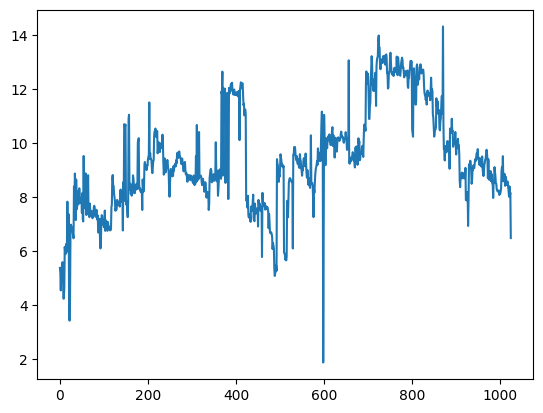

In [34]:
plt.plot(x,pred1)
plt.show()

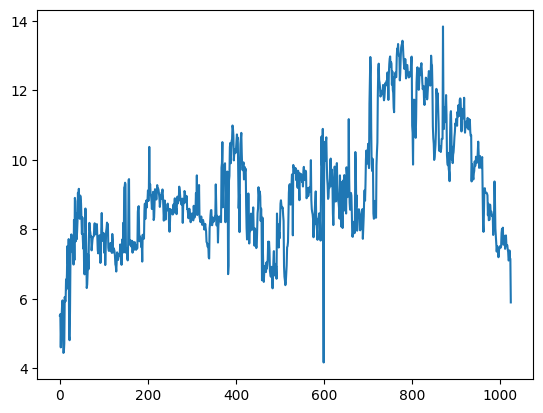

In [35]:
plt.plot(x,pred2)
plt.show()

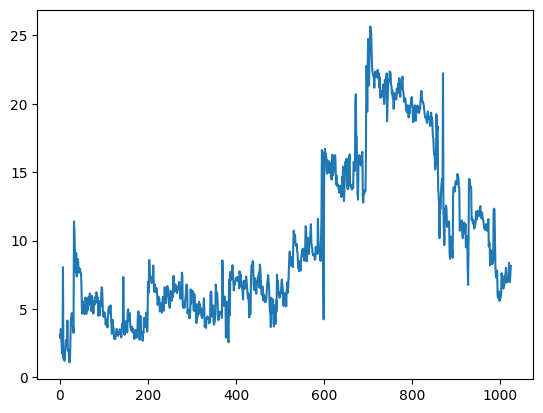

In [36]:
plt.plot(x,pred3)
plt.show()

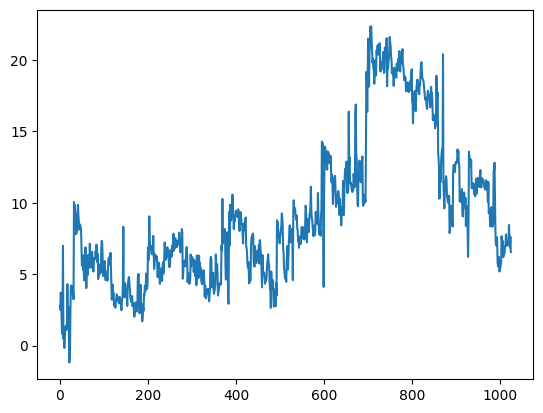

In [38]:
plt.plot(x,pred4)
plt.show()

In [8]:
alert1 = []
alert2 = []
alert3 = []
alert4 = []

for i in prediction :
    if i < 5.00 :
        alert1.append('SAFE')
    elif 5.00<=i<10.00 :
        alert1.append('MODERATE')
    elif 10.00<=i<20.00 :
        alert1.append('HIGH')
    else :
        alert1.append('CRITICAL')
        
for i in prediction2 :
    if i < 5.00 :
        alert2.append('SAFE')
    elif 5.00<=i<10.00 :
        alert2.append('MODERATE')
    elif 10.00<=i<20.00 :
        alert2.append('HIGH')
    else :
        alert2.append('CRITICAL')
        
for i in prediction3 :
    if i < 5.00 :
        alert3.append('SAFE')
    elif 5.00<=i<10.00 :
        alert3.append('MODERATE')
    elif 10.00<=i<20.00 :
        alert3.append('HIGH')
    else :
        alert3.append('CRITICAL')
    
for i in prediction4 :
    if i < 5.00 :
        alert4.append('SAFE')
    elif 5.00<=i<10.00 :
        alert4.append('MODERATE')
    elif 10.00<=i<20.00 :
        alert4.append('HIGH')
    else :
        alert4.append('CRITICAL')

NameError: name 'prediction' is not defined

In [55]:
Modified_plant = pd.read_csv('Modified_plant.csv')
Modified_plant['Alert1'] = alert1
Modified_plant['Alert2'] = alert2
Modified_plant['Alert3'] = alert3
Modified_plant['Alert4'] = alert4
Modified_plant.to_csv('Modified_plant_final.csv', index=False)

In [56]:
Actual_alert1 = []
Actual_alert2 = []
Actual_alert3 = []
Actual_alert4 = []

for i in Modified_plant['c51'] :
    if i < 5.00 :
        Actual_alert1.append('SAFE')
    elif 5.00<=i<10.00 :
        Actual_alert1.append('MODERATE')
    elif 10.00<=i<20.00 :
        Actual_alert1.append('HIGH')
    else :
        Actual_alert1.append('CRITICAL')
        
for i in Modified_plant['c52'] :
    if i < 5.00 :
        Actual_alert2.append('SAFE')
    elif 5.00<=i<10.00 :
        Actual_alert2.append('MODERATE')
    elif 10.00<=i<20.00 :
        Actual_alert2.append('HIGH')
    else :
        Actual_alert2.append('CRITICAL')
        
for i in Modified_plant['c53'] :
    if i < 5.00 :
        Actual_alert3.append('SAFE')
    elif 5.00<=i<10.00 :
        Actual_alert3.append('MODERATE')
    elif 10.00<=i<20.00 :
        Actual_alert3.append('HIGH')
    else :
        Actual_alert3.append('CRITICAL')
        
for i in Modified_plant['c54'] :
    if i < 5.00 :
        Actual_alert4.append('SAFE')
    elif 5.00<=i<10.00 :
        Actual_alert4.append('MODERATE')
    elif 10.00<=i<20.00 :
        Actual_alert4.append('HIGH')
    else :
        Actual_alert4.append('CRITICAL')


In [57]:
count1 = 0
for i in range(len(Modified_plant['c51'])) :
    if Actual_alert1[i] == Modified_plant['Alert1'][i] :
        count1 = count1 + 1

print(count1 / len(Modified_plant['c51']))

0.9541463414634146


In [58]:
count2 = 0
for i in range(len(Modified_plant['c52'])) :
    if Actual_alert2[i] == Modified_plant['Alert2'][i] :
        count2 = count2 + 1

print(count2 / len(Modified_plant['c52']))

0.9785365853658536


In [59]:
count3 = 0
for i in range(len(Modified_plant['c53'])) :
    if Actual_alert3[i] == Modified_plant['Alert3'][i] :
        count3 = count3 + 1

print(count3 / len(Modified_plant['c53']))

0.8878048780487805


In [60]:
count4 = 0
for i in range(len(Modified_plant['c54'])) :
    if Actual_alert4[i] == Modified_plant['Alert4'][i] :
        count4 = count4 + 1

print(count4 / len(Modified_plant['c54']))

0.8468292682926829


In [18]:
# Actual_alert = []
# for i in range(len(Modified_plant['c51'])) :
#     if (Actual_alert1[i] == 'SAFE' and Actual_alert2[i] == 'SAFE' and Actual_alert3[i] == 'SAFE' and Actual_alert4[i] == 'SAFE') :
#         Actual_alert.append('SAFE')

total_average1 = []
for column in new_C.columns :
    total_average1.append(new_C[column].mean())
    
coefficients1 = new_model.params

weighted_sum1 = 0
for i in range(len(total_average1)) :
    weighted_sum1 = weighted_sum1 + coefficients1[i]*total_average1[i]
    

weightage1 = []
for i in range(len(total_average1)) :
    weightage1.append(coefficients1[i]*total_average1[i]/weighted_sum1)
    

columns1 = []
for column in new_C.columns :
    columns1.append(column)

print(columns1)

['c27', 'c28', 'c31', 'c32', 'c33', 'c39', 'c139', 'c142', 'c143', 'c155', 'c156', 'c157', 'c158', 'c160', 'c161']


[-12.98778248648764, 1.0097481532860013, 2.381942593559459, 3.9425967511618327, 8.420548200589275, 0.8108902545130664, -0.24946627308064004, -2.727884100063034, 0.3669265559117701, 0.13283573300739718, -0.002684617748266016, -0.3743256475231085, 0.29832533897443964, -0.4064221039674237, 0.38475164786687166]


In [19]:
dict1 = dict(zip(columns1,weightage1))

{'c27': -12.98778248648764, 'c28': 1.0097481532860013, 'c31': 2.381942593559459, 'c32': 3.9425967511618327, 'c33': 8.420548200589275, 'c39': 0.8108902545130664, 'c139': -0.24946627308064004, 'c142': -2.727884100063034, 'c143': 0.3669265559117701, 'c155': 0.13283573300739718, 'c156': -0.002684617748266016, 'c157': -0.3743256475231085, 'c158': 0.29832533897443964, 'c160': -0.4064221039674237, 'c161': 0.38475164786687166}


In [22]:
sorted_dict1 = dict(sorted(dict1.items(), key=lambda item: item[1], reverse=True))
controllable1 = sorted_dict1.keys()
print(controllable1)

dict_keys(['c33', 'c32', 'c31', 'c28', 'c39', 'c161', 'c143', 'c158', 'c155', 'c156', 'c139', 'c157', 'c160', 'c142', 'c27'])


In [24]:
total_average2 = []
for column in new_C2.columns :
    total_average2.append(new_C2[column].mean())
    
coefficients2 = new_model2.params

weighted_sum2 = 0
for i in range(len(total_average2)) :
    weighted_sum2 = weighted_sum2 + coefficients2[i]*total_average2[i]
    

weightage2 = []
for i in range(len(total_average2)) :
    weightage2.append(coefficients2[i]*total_average2[i]/weighted_sum2)
    

columns2 = []
for column in new_C2.columns :
    columns2.append(column)
    
dict2 = dict(zip(columns2,weightage2))

sorted_dict2 = dict(sorted(dict2.items(), key=lambda item: item[1], reverse=True))
controllable2 = sorted_dict2.keys()
print(controllable2)
print(sorted_dict2)

dict_keys(['c26', 'c31', 'c30', 'c143', 'c28', 'c39', 'c161', 'c158', 'c155', 'c157', 'c160', 'c139', 'c32', 'c142', 'c27', 'c33', 'c29'])
{'c26': 28.780572850256796, 'c31': 3.5241616563590106, 'c30': 3.192329465437113, 'c143': 1.1968352297127256, 'c28': 0.8068225108006348, 'c39': 0.33437996244076856, 'c161': 0.29742001557782244, 'c158': 0.19557983698802497, 'c155': 0.09251608752953354, 'c157': -0.18169128033310447, 'c160': -0.24216295932234205, 'c139': -0.396148346864333, 'c32': -2.0692045308934723, 'c142': -5.03711498330419, 'c27': -5.935580798052176, 'c33': -6.5974054896013, 'c29': -16.961309226731515}


In [25]:
total_average3 = []
for column in new_C3.columns :
    total_average3.append(new_C3[column].mean())
    
coefficients3 = new_model3.params

weighted_sum3 = 0
for i in range(len(total_average3)) :
    weighted_sum3 = weighted_sum3 + coefficients3[i]*total_average3[i]
    

weightage3 = []
for i in range(len(total_average3)) :
    weightage3.append(coefficients3[i]*total_average3[i]/weighted_sum3)
    

columns3 = []
for column in new_C3.columns :
    columns3.append(column)
    
dict3 = dict(zip(columns3,weightage3))

sorted_dict3 = dict(sorted(dict3.items(), key=lambda item: item[1], reverse=True))
controllable3 = sorted_dict3.keys()
print(controllable3)
print(sorted_dict3)

dict_keys(['c26', 'c31', 'c143', 'c30', 'c28', 'c155', 'c163', 'c156', 'c162', 'c160', 'c157', 'c39', 'c139', 'c33', 'c27', 'c142'])
{'c26': 7.314075166837057, 'c31': 5.799979476303443, 'c143': 2.7160263221059897, 'c30': 2.338021800503694, 'c28': 1.4823632176934667, 'c155': 0.7471860902226916, 'c163': 0.3351030977530165, 'c156': -0.006777474379232165, 'c162': -0.0927693174982213, 'c160': -0.20811080396960496, 'c157': -0.31497331925099514, 'c39': -0.3195676082348865, 'c139': -0.41500216082064884, 'c33': -3.0343853669205902, 'c27': -6.56329354769821, 'c142': -8.777875572646971}


In [26]:
total_average4 = []
for column in new_C4.columns :
    total_average4.append(new_C4[column].mean())
    
coefficients4 = new_model4.params

weighted_sum4 = 0
for i in range(len(total_average4)) :
    weighted_sum4 = weighted_sum4 + coefficients4[i]*total_average4[i]
    

weightage4 = []
for i in range(len(total_average4)) :
    weightage4.append(coefficients4[i]*total_average4[i]/weighted_sum4)
    

columns4 = []
for column in new_C4.columns :
    columns4.append(column)
    
dict4 = dict(zip(columns4,weightage4))

sorted_dict4 = dict(sorted(dict4.items(), key=lambda item: item[1], reverse=True))
controllable4 = sorted_dict4.keys()
print(controllable4)
print(sorted_dict4)

dict_keys(['c26', 'c31', 'c30', 'c143', 'c155', 'c158', 'c163', 'c161', 'c156', 'c162', 'c160', 'c157', 'c139', 'c39', 'c33', 'c142', 'c27'])
{'c26': 11.598384982959296, 'c31': 4.340429384238907, 'c30': 3.1872198262724916, 'c143': 2.8939985317021697, 'c155': 0.648806966284688, 'c158': 0.34954658651554077, 'c163': 0.3139292674890254, 'c161': 0.23649184812582133, 'c156': -0.006521138877988504, 'c162': -0.12710548303458472, 'c160': -0.36201739287396684, 'c157': -0.5020627159623605, 'c139': -0.5590058386972927, 'c39': -0.5715932269425654, 'c33': -4.57159345943686, 'c142': -6.741344152729994, 'c27': -9.127563985032326}
